<table>
  <tr>
    <td style="text-align: left;">
      <h1>Lighthouse Labs</h1>
      <h2>W9D4 - Applications of Machine Learning</h2>
      <strong>Instructor:</strong> Socorro E. Dominguez-Vidana
    </td>
    <td style="text-align: right;">
      <img src="img/lhl.jpeg" alt="LHL" width="200">
    </td>
  </tr>
</table>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W9D4%2FW9D4_Applications_of_ML.ipynb)

#### Overview

- [] Introduction to Machine Learning Applications
- [] Why Feature Engineering Matters?
- [] Applications in Different Domains
- [] Key ML Techniques for Each Domain
- [] Evaluation Metrics

## Introduction to Machine Learning Applications

There are a *ton* of machine learning applications -- too many to discuss in just one lecture...

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/applications-of-machine-learning.png" alt="Applications of Machine Learning" width = 300>
<figcaption>
    Javatpoint. (n.d.). <em>Applications of Machine Learning</em> [Image]. Javatpoint. 
    <a href="https://static.javatpoint.com/tutorial/machine-learning/images/applications-of-machine-learning.png">https://static.javatpoint.com/tutorial/machine-learning/images/applications-of-machine-learning.png</a>
</figcaption>

Machine Learning is transforming industries by providing data-driven insights and automation. The applications of **ML** can be broadly classified into supervised, unsupervised, and reinforcement learning tasks.

## Choosing the right algorithm

One of the biggest challenges when tackling any machine learning algorithm is choosing the right algorithm - which . At this stage of your career this will probably feel daunting and difficult, but with more experience, you will realize that the problem itself will guide you toward the most effective tools and methods.

<img src="img/480602_1_En_5_Fig1_HTML.webp" alt="Dhall, D., Kaur, R., Juneja, M. (2020). Machine Learning: A Review of the Algorithms and Its Applications. In: Singh, P., Kar, A., Singh, Y., Kolekar, M., Tanwar, S. (eds) Proceedings of ICRIC 2019 . Lecture Notes in Electrical Engineering, vol 597. Springer, Cham. https://doi.org/10.1007/978-3-030-29407-6_5" width = 350>

## Why Feature Engineering Matters?

<table>
<tr>
<td  style="text-align: left;"><img src="img/barista_arm.jpg" alt="Barista Arm" width="1000">
<td> 
    A Seattle coffee company has changed how lattes and espressos are made. Artly, a 2-year-old startup just raised $8.3 million to fuel growth of its robotic baristas.
    Artly has developed an AI-powered machine that it claims makes a "perfect cup of coffee every time," using computer vision algorithms to guide a robotic arm and monitor drink quality. <br> <br>
<br><br>

[Bishop, T. (2022, October 20). Robotic coffee barista maker led by ex-AWS engineer raises $8.3M to open more retail locations. GeekWire](https://www.geekwire.com/2022/robotic-coffee-barista-maker-led-by-ex-aws-engineer-raises-8-3m-to-open-more-retail-locations/)

<br>
</td>
</tr>
</table>



Today we are going to develop **BrewMaster3000X**.

<img src=https://journals.sagepub.com/cms/10.1177/1729881416677695/asset/images/large/10.1177_1729881416677695-fig1.jpeg width=300>

 **BrewMaster3000X** will take a different approach, we will use the fact that we can define the position of the tip with the following equations:

> $x = a_2 \cos{\theta_1} \cos{\theta_2} + a_3 \cos{\theta_1} \cos{(\theta_2 + \theta_3)}$  

This equation determines the horizontal position of the tip in the `x-axis`, influenced by both joint angles ($\theta_1$, $\theta_2$, $\theta_3$) and the arm segment lengths ($a_2$ and $a_3$).

> $y = a_2 \sin{\theta_1} \cos{\theta_2} + a_3 \sin{\theta_1} \cos{(\theta_2 + \theta_3)}$  

This equation provides the horizontal position along the `y-axis`. Together with the `x-equation`, it fully specifies the tip's horizontal position, incorporating the robot’s rotation about the base ($\theta_1$).

> $z = a_2 \sin{\theta_2} + a_3 \sin{(\theta_2 + \theta_3)}$  

This equation defines the vertical position, capturing the height of the tip above the workspace as influenced by the second and third joints.
  
- The inputs are the joint angles $\theta_1$, $\theta_2$, and $\theta_3$, 
- The outputs are the tip position $(x,y,z)$.

The equations work together to map the arm’s complex movements into a clear, predictable path in space.

When **BrewMaster3000X** reaches out to pour coffee or create latte art, these equations ensure that its tip moves precisely where it needs to be, avoiding errors and delivering a flawless brew every time. Predicting the tip's position is the key to turning a simple robotic arm into an artist of the coffee world.

### Challenges for our robot arm:

As a barista, BrewMaster3000 needed to perform tasks requiring pinpoint accuracy, such as:
- Pouring coffee into a cup without spilling.
- Creating latte art by moving the tip of the steam wand precisely.
- Picking up and placing cups or saucers in tight spaces.
- Operating in a crowded workspace, where predicting its movements ensures it won’t knock over other items.

For this, let's try to build a simple **neural network** (`multi-layer perceptron`) regressor to model the relationship between joint angles and tip position.

First we'll set up the data based on the physical equations -- imagine we actually recorded these from an experiment.

In [1]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
### Toy data
a1 = 0.54
a2 = 0.36

N = 100

q1 = 2*np.pi*np.random.rand(N)
q2 = 2*np.pi*np.random.rand(N)
q3 = 2*np.pi*np.random.rand(N)

x_end = a1*np.cos(q1)*np.cos(q2) + a2*np.cos(q1)*np.cos(q2+q3)
y_end = a1*np.sin(q1)*np.cos(q2) + a2*np.sin(q1)*np.cos(q2+q3)
z_end = a1*np.sin(q2) + a2*np.sin(q2+q3)

X = np.concatenate([q1.reshape(-1,1), q2.reshape(-1,1), q3.reshape(-1,1)],axis=1)
y = np.concatenate([x_end.reshape(-1,1), y_end.reshape(-1,1), z_end.reshape(-1,1)],axis=1)

In [3]:
X[0]

array([4.37883903, 0.34684846, 0.29600127])

Next, let's setup and train the neural network.

In [4]:
mlp_basic = MLPRegressor(hidden_layer_sizes=(100,))
mlp_basic.fit(X,y)

MLPRegressor()

Now we can predict the outputs and evaluate the error.

In [5]:
y_pred = mlp_basic.predict(X)

In [6]:
mean_absolute_error(y,y_pred)

np.float64(0.22263402192300832)

What if, instead of simply using the joint angles as inputs, we acknowledged the role of **trigonometry** in the conversion between *joint angles* and *positional coordinates*? By doing so, we can engineer additional features to improve our model's representation of the system.

Instead of only feeding the 3 joint angles ($\theta_1$, $\theta_2$, $\theta_3$) as inputs, we can compute their **sine** and **cosine** values and use these as inputs. Our new input set would then be:

($\cos{\theta_1}$, $\sin{\theta_1}$, $\cos{\theta_2}$, $\sin{\theta_2}$, $\cos{\theta_3}$, $\sin{\theta_3}$)


In [7]:
X = np.concatenate([q1.reshape(-1,1), q2.reshape(-1,1), q3.reshape(-1,1)],axis=1)
X_feng = np.concatenate([np.cos(X), np.sin(X)],axis=1)
X_feng[0]


array([-0.32739938,  0.9404487 ,  0.95651055, -0.94488605,  0.33993564,
        0.29169773])

In [8]:
mlp_feng = MLPRegressor(hidden_layer_sizes=(100,))
mlp_feng.fit(X_feng,y)

MLPRegressor()

In [9]:
y_pred_feng = mlp_feng.predict(X_feng)

In [10]:
mean_absolute_error(y,y_pred_feng)

np.float64(0.08900489232278345)

Recognize these trigonometric identities:

$\cos(\theta_1 + \theta_2) = \cos\theta_1\cos\theta_2 - \sin\theta_1\sin\theta_2$

In [11]:
q1r = q1.reshape(-1,1)
q2r = q2.reshape(-1,1)
q3r = q3.reshape(-1,1)
X = np.concatenate([q1r, q2r, q3r, q1r+q2r, q1r+q3r, q2r+q3r, q1r+q2r+q3r],axis=1)
X_feng = np.concatenate([np.cos(X), np.sin(X)],axis=1)

In [12]:
mlp_feng = MLPRegressor(hidden_layer_sizes=(100,))
mlp_feng.fit(X_feng,y)

MLPRegressor()

In [13]:
y_pred_feng = mlp_feng.predict(X_feng)

In [14]:
mean_absolute_error(y,y_pred_feng)

np.float64(0.05849829170830978)

In [15]:
q1r = q1.reshape(-1,1)
q2r = q2.reshape(-1,1)
q3r = q3.reshape(-1,1)
X = np.concatenate([q1r, q2r, q3r, q1r+q2r, q1r+q3r, q2r+q3r, q1r+q2r+q3r, q1r-q2r, q1r-q3r, q2r-q3r, q1r-q2r+q3r, q1r+q2r-q3r, q1r-q2r-q3r],axis=1)
X_feng = np.concatenate([np.cos(X), np.sin(X)],axis=1)

mlp_feng = MLPRegressor(hidden_layer_sizes=(100,))
mlp_feng.fit(X_feng,y)

z_feng = mlp_feng.predict(X_feng)

mean_absolute_error(y,z_feng)

np.float64(0.04462438862429715)

In [16]:
mean_absolute_error(x_end + 1,np.ones_like(x_end)*np.mean(x_end+1))

np.float64(0.2360743314075817)

We observe a lower error now. **Forward kinematics** involves determining the position of the robotic arm's tip (end effector) based on the angles of its joints and the lengths of its links. The equations for the position in **3D** space are **inherently trigonometric**. By thoughtfully designing our inputs, we've relieved the neural network from the burden of learning the underlying trigonometric relationships, and the model can focus on solving the problem more efficiently.

**Takeaway:** Prepare your data in a way that makes it easier for the model to learn.  
**Takeaway II:** Some of these ideas will only come by interdisciplinary teams and working with folks that have domain expertise but it will be your responsibility too to study and read papers related to the work hat you are doing.


## Evaluation Metrics

#### The Story: Dr. Patel's Clinic

Dr. Patel runs a busy cardiology clinic. Every day, she evaluates dozens of patients with varying risk factors for heart disease, such as age, blood pressure, cholesterol levels, and more. While Dr. Patel is experienced, she’s aware that even the best doctors can miss subtle patterns in the data. To ensure her patients receive the best care, she decides to use a machine learning model to help predict which patients are at high risk of developing heart disease.

The stakes are high:  
- **False negatives (missed cases)** could lead to untreated heart disease and potentially fatal outcomes.  
- **False positives (incorrectly flagged cases)** might lead to unnecessary stress for patients and expensive tests.

Dr. Patel must choose the right evaluation metric to trust her model and make informed decisions.


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
data = pd.read_csv('data/heart_disease.csv')
#data['target'] = data['target'].apply(lambda x: 0 if x == 0 else 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [19]:
X = data.drop('target', axis=1)
y = data['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.score(X_test, y_test)

0.5081967213114754

### ? What does that even mean?

When working with `sklearn` the deffault metric it uses is `accuracy`. `Accuracy` is easy to understand and interpret and in cases where all classes are equally important. `Accuracy` has been historically used in machine learning tasks, especially for early classification problems.

#### Accuracy
- The ratio of correctly predicted cases (both true positives and true negatives) to the total number of cases.  

    > $\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$

- Accuracy is a good metric **when classes are balanced** (i.e., there are roughly equal numbers of patients with and without heart disease).  

- **Why It’s Misleading in This Case**: If only 10% of patients have heart disease, a model that always predicts *"no disease"* will have **90%** accuracy but will not identify at-risk patients.

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.51



#### Precision
- The ratio of true positives **TP** to all predicted positives **PP**. 
    >  $\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}$

- **In Other Words**: Of all the patients the model says have heart disease, how many actually do? 
- Useful when the **cost of a false positive is high**. If Dr. Patel is concerned about sending patients for unnecessary and invasive tests, she would prioritize precision.

- For multiple classes:
    > $\text{Precision}_{\text{micro}} = \frac{\text{Sum of True Positives (TP)}}{\text{Sum of Predicted Positives}}$

In [25]:
precision = precision_score(y_test, y_pred, average= 'micro')
print(f"Precision: {precision:.2f}")

Precision: 0.51


#### Recall (Sensitivity)
- The ratio of true positives to all actual positives. 
    >  $\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$

- **In Other Words**: Of all the patients who truly have heart disease, how many did the model correctly identify?  
- Useful when the **cost of a false negative is high**, meaning it’s critical not to miss any patients with heart disease.
- For multiple classes:
    > $
\text{Recall}_{\text{micro}} = \frac{\text{Sum of True Positives (TP)}}{\text{Sum of Actual Positives (TP + FN)}}
$

In [26]:
recall = recall_score(y_test, y_pred, average= 'micro')
print(f"Recall: {recall:.2f}")

Recall: 0.51


#### F1 Score
- The harmonic mean of precision and recall.  
    > $F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$
- In Dr. Patel's case, both false positives and false negatives have significant consequences. The F1 score provides a balanced measure of the model's ability to correctly identify heart disease cases without overwhelming the clinic with false alarms.
- For multiple classes:
    > $\text{F1}{\text{micro}} = 2 \cdot \frac{\text{Precision}{\text{micro}} \cdot \text{Recall}{\text{micro}}}{\text{Precision}{\text{micro}} + \text{Recall}_{\text{micro}}}$


In [27]:
f1 = f1_score(y_test, y_pred, average= 'micro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.51


#### **ROC** and **AUC** in Classification Models

The **ROC** (`Receiver Operating Characteristic`) curve and **AUC** (`Area Under the Curve`) help assess a model's ability to distinguish between classes at various threshold levels.

It plots the **True Positive Rate** (TPR) (`recall`) against the **False Positive Rate** (FPR) at different thresholds.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png width=500>

**AUC** quantifies the entire two-dimensional area underneath the **ROC** curve, providing a single value to summarize model performance.
- Range: $0 \leq \text{AUC} \leq 1$

- Interpretation:
	- AUC = 1.0: Perfect model.
	- AUC = 0.5: No discriminative power (random guessing).
	- AUC < 0.5: Model performs worse than random guessing.

- Unlike *precision*, *recall*, or *accuracy*, which depend on a specific threshold, **AUC** evaluates performance across all possible thresholds.
- AUC remains a reliable metric even when class distributions are imbalanced.

In [28]:
y_pred_proba = model.predict_proba(X_test)

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output (One-vs-Rest approach)
classes = [0, 1, 2, 3, 4]
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute the AUC for each class against the rest
roc_auc_ovr = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"One-vs-Rest ROC-AUC: {roc_auc_ovr:.2f}")

One-vs-Rest ROC-AUC: 0.79


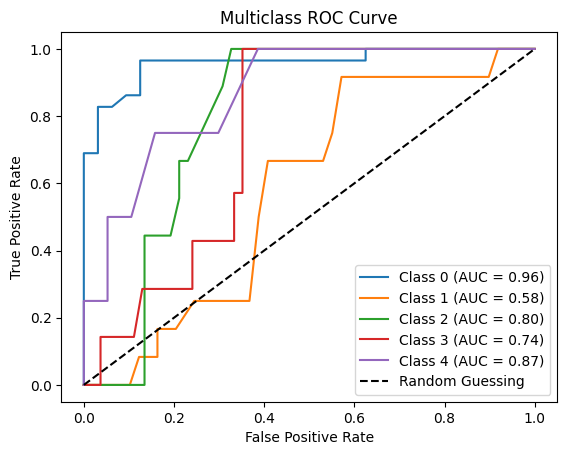

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC for each class
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
# Compute the AUC using One-vs-One approach
roc_auc_ovo = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovo')
print(f"One-vs-One ROC-AUC: {roc_auc_ovo:.2f}")

One-vs-One ROC-AUC: 0.79


#### Choosing the Right Approach

When Dr. Patel finishes work, she works on her garden. Suppose she wants to build an ML algorithm to predict if plants need to be watered or not - planning for days she may not have time because of her busy schedule. 

She gathers training data that specifies particular conditions like `temperature`, `humidity`, `sunlight`, etc., and our output is simply classification (`0` or `1`, irrigate or not).

The following true set of irrigation outputs:

`[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]`

...or, water every second day...

*Case 1:* The ML algorithm predicts:

`[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]`

That's just 100% accurate -- great!

*Case 2:* The ML algorithm predicts:

`[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]`

...that's 0% accurate... but do you think the plants would grow poorly?

*Case 3:* The ML algorithm predicts:

`[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]`

*Case 4:* The ML algorithm predicts:

`[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]`

With case 1 we get 100% accuracy, with case 2 we get 0% accuracy, and with cases 3 and 4 we get 50% accuracy. Case 1 is obviously good, but are cases 3 and 4 equally good, and both (or either) better than case 2?

Transforming the data, what if we looked at the *cumulative* irrigation decisions?

Here would be the true results:

`[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]`

And for each case:

*Case 1:*  
`[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]`

*Case 2:*  
`[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6]`

*Case 3:*  
`[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]`

*Case 4:*  
`[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]`

#### Metrics for Regression

##### $\(R^2\$ (Coefficient of Determination)
- Measures the proportion of variance in the dependent variable explained by the independent variables.  
- Provides a sense of how well the model fits the data overall.  
- $\(R^2\$ can be misleading when there are outliers.

*Case 1:* 1.0

*Case 2:* 0.83

*Case 3:* -3.17

*Case 4:* -4.2

##### MSE (Mean Squared Error)

- Measures the average of the squared differences between actual and predicted values.

    > $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

- Penalizes larger errors more than MAE because the errors are squared.
- Provides a sense of how “bad” the larger errors are.
- Since errors are squared, MSE is not in the same unit as the target variable, which makes interpretation harder.

*Case 1:* 0.0

*Case 2:* 0.5

*Case 3:* 12.16

*Case 4:* 15.16

##### MAE (Mean Absolute Error)

- Measures the average of the absolute differences between actual and predicted values.

    > $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

- MAE is simple to interpret as it provides an average error in the same units as the target variable.

- Less sensitive to outliers compared to MSE and RMSE because it doesn’t square the errors.

If we judged based on the **M**ean **A**bsolute **E**rror we would get:

*Case 1:* 0.0

*Case 2:* 0.5

*Case 3:* 3.0

*Case 4:* 3.5

Now, the model is showcasing **Case 2** as being better than **Case 3** or **Case 4**


### 2. RMSE (Root Mean Squared Error)
- Measures the average magnitude of error in predictions, penalizing larger errors more heavily.  
- Unlike $R^2$ , RMSE provides an intuitive, absolute scale for error. It highlights the **impact of large prediction errors**.

*Case 1:* 0.0

*Case 2:* 0.70

*Case 3:* 3.48

*Case 4:* 3.89

- MAE is the most interpretable for irrigation decisions, showing the average error in real units. It helps in practical decision-making.

- RMSE is a good compromise if larger errors are more critical but still need to be interpretable.

- MSE provides more emphasis on large errors but is harder to interpret due to squared units.

- R² is not ideal here since it doesn’t directly reflect the magnitude of errors and is negative, indicating poor model performance.

In this context, MAE or RMSE would be the most useful metrics.

#### References:
Applications of ML notebook by Eithar Elbasheer